# Context

Analysis of **causal effects** is an important activity in risk analysis.
- *Process safety engineer*: "To what extent does increased process temperature and pressure increase the level of corrosion of my equipment?"
- *Medical researcher*: "What is the mortality impact of smoking 2 packets of cigarettes per day?"
- *Safety regulator*: "Do more frequent site inspections lead to a lower accident rate?"
- *Life insurer*: "What is the conditional probability when one spouse dies, that the other will die shortly afterwards?"

The simplest statistical technique for analyzing causal effects is **correlation analysis**. It measures the extent to which two variables vary together, including the strength and direction of their relationship.

# Measuring linear correlation

The linear correlation coefficient $\rho$ (also called the *Pearson product-moment correlation coefficient*) measures the strength and direction of a linear association between two random variables.

$$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y} = \frac{\mathop{\mathbb{E}}{(X - \mu_X)(Y - \mu_Y)}}{\sigma_X \sigma_Y}$$

The linear correlation coefficient $\rho$ quantifies the strengths and directions of movements in two random variables:
- The **sign** of $\rho$ determines the relative directions that the variables move in.
- The **value** determines strength of the relative movements (ranging from $-1$ to $+1$).

Eg. $\rho = 0.5$ means one variable moves in the same direction by half the amount that the other variable moves. $\rho = 0$ means variables are uncorrelated (*does not imply that they are independent!*).

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

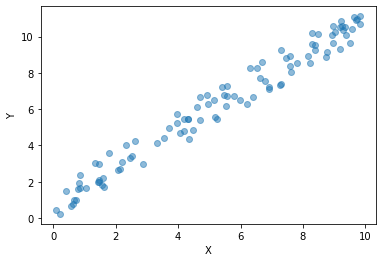

In [2]:
X = np.random.uniform(0, 10, 100)
Y = X + np.random.uniform(0, 2, 100)

plt.scatter(X, Y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Looking at the scatterplot above, we can see that the random variables $X$ and $Y$ are correlated. There are various statistical measures that allow us to quantify the degree of linear correlation. The most commonly used is **Pearson’s product-moment correlation coefficient**. It is available in `scipy.stats`.

In [3]:
corr_XY = scipy.stats.pearsonr(X, Y)
print(corr_XY)

(0.9846539345758004, 4.094577675354664e-76)


The first return value is the linear correlation coefficient, a value between -1 and 1 which measures the strength of the linear correlation. It indicates a strong positive linear correlation.

The second return value is a **p-value**, which is a measure of the confidence which can be placed in the estimation of the correlation coefficient (smaller = more confidence). Here we have a very very low p-value, so high confidence in the estimated value of the correlation coefficient.

# Correlation matrix

A correlation matrix is used to investigate the dependence between multiple variables at the same time
- Output: a symmetric matrix where element $m_{ij}$ is the correlation coefficient between variables $i$ and $j$
- Note: diagonal elements are always 1
- Can be visualized graphically using a **correlogram**
- Allows to see which variables in the data are informative

In [4]:
data = pd.read_csv("http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2018.csv")
data.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2018010080971,1,1,2,2,50,8,3,0,0,2,0,0,9,1,8
1,2018010080971,2,2,1,1,48,8,3,0,0,0,0,0,8,1,1
2,2018010080973,1,1,3,1,29,6,3,5,1,0,0,2,0,1,3
3,2018010080974,1,1,1,1,40,7,3,0,0,0,0,0,8,1,3
4,2018010080981,1,1,1,1,27,6,2,0,0,0,0,0,9,1,7


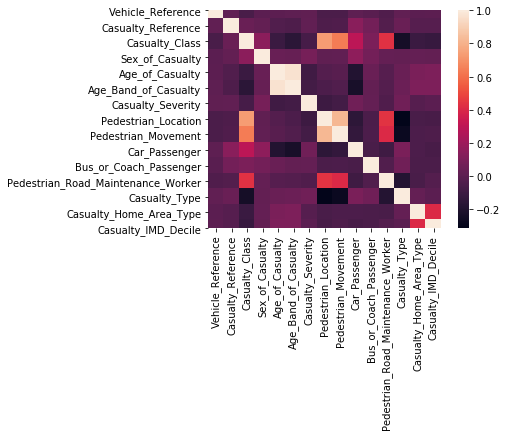

In [5]:
corr_matrix = data.corr()

sns.heatmap(corr_matrix, square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

# Beware assumptions of causality

In 1964 the US Surgeon General issues a report claiming that cigarette smoking causes lung cancer, based mostly on correlation data from medical studies. However, correlation is not sufficient to demonstrate causality. There might be some hidden genetic factor that causes both lung cancer and desire for nicotine.

To demonstrate the causality, we need a **randomized controlled experiment**.

1. Assume we have the power to force people to smoke or not smoke (we ignore moral issues for now).
2. Take a large group of people and divide them into two groups
    - One group is obliged to smoke
    - Other group not allowed to smoke (the "control" group)
3. Observe whether smoker group develops more lung cancer than the control group

By doing this, we have eliminated any possible hidden factor causing both smoking and lung cancer.

# Constructing arguments of causality from observations

Causality is an important — and complex — notion in risk analysis and many areas of science, with two main approaches used
- **Conservative approach** used mostly in the physical sciences requires:
    - A plausible physical model for the phenomenon showing how A might lead to B
    - Observations of correlation between A and B
- **Relaxed approach** used in the social sciences requires:
    - A randomized controlled experiment in which the choice of receiving the treatment A is determined only by a random choice made by the experimenter
    - Observations of correlation between A and B
    
Alternative relaxed approach: a quasi-experimental *natural experiment*

# Natural experiments and causal inference

It is an empirical study in which allocation between experimental and control treatments are determined by factors outside the control of investigators but which resemble random assignment.

Eg. In testing whether military service subsequently affected job evolution and earnings, economists examined difference between American males drafted for the Vietnam war and those not drafted:
- Draft was assigned on the basis of date of birth, so *control* and *treatment* groups likely to be similar statistically
- **Findings**: earnings of veterans approx. 15% lower than those of non-veterans

Another Eg. Cholera outbreak in London in 1854 led to 616 deaths.

Medical doctor J. Snow discovered a strong association between the use of the water from specific public water pumps and
deaths and illnesses due to cholera:
- *Bad* pumps supplied by a company that obtained water from the rivers Thames downstream of a raw sewage discharge
- *Good* pumps obtained water from the Thames upstream from the discharge point
- **Findings**: Cholera outbreak stopped when the *bad* pumps were shutdown